# Theoretical F1-Score (Figures 5 and 6)
Produces Figures 5 and 6, which present the theoretical evolution of F1-score for different contamination rates of the test set (Figure 5) and for different thresholds (Figure 6).

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

from utils.helpers import cont_to_anomalies_per_clean_sample
from utils.scores import compute_f1_score

## Figure 5
Theoretical F1-score for varying contamination rates of the test set.

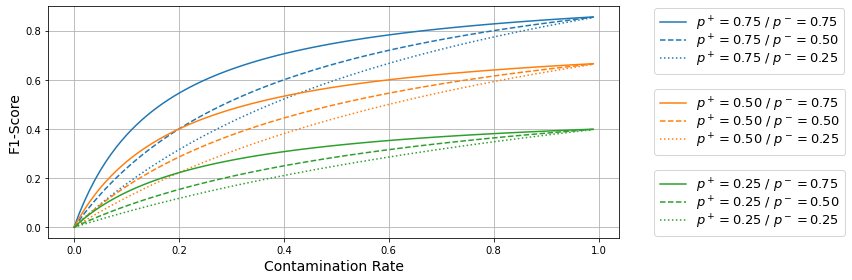

In [2]:
n_points = 100
plt.figure(figsize=[12,4])
legend_loc = 1.02
for i_p_plus, p_plus in enumerate([0.75, 0.5, 0.25]):
    plots = []
    for p_minus, line_type in [(0.75, "-"), (0.5, "--"), (0.25, ":")]:
        n_clean = 1
        n_anomalies = cont_to_anomalies_per_clean_sample(np.linspace(0, 1, n_points, endpoint=False))
        precision = p_plus * n_anomalies / (p_plus * n_anomalies + (1 - p_minus) * n_clean)
        recall = p_plus
        f1_score = 2 * precision * recall / (precision + recall)
                        
        label = f"$p^+={p_plus:.2f}$ / $p^-={p_minus:.2f}$"
        
        p = plt.plot(n_anomalies / (n_clean + n_anomalies), f1_score, f"C{i_p_plus}{line_type}", label=label)
        plots.append(p[0])
    legend = plt.legend(handles=plots, bbox_to_anchor=(1.05, legend_loc), loc='upper left', fontsize=13, labelspacing=0)
    if i_p_plus < 2:
        plt.gca().add_artist(legend)
    legend_loc -= 0.35
        
plt.xlabel("Contamination Rate", fontsize=14)
plt.ylabel('F1-Score', fontsize=14)

plt.grid()
plt.tight_layout()
plt.savefig(f"./results/F1score_over_A.pdf", format="pdf", dpi=512)
plt.show()

## Figure 6
Theoretical example of the evolution of the F1-score for different thresholds and contamination rates of the test set.

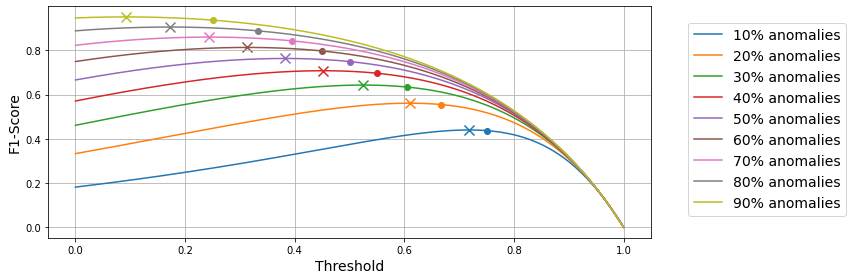

In [3]:
n_points = 10000
plt.figure(figsize=[12,4])
for n_anomalies in range(10, 100, 10):
    n_clean = 100 - n_anomalies
    # solving FP = FN <=> Ct² - 2Ct + C = At²
    a, b, c = n_clean - n_anomalies, -2 * n_clean, n_clean
    fpfn_threshold = (-math.sqrt(b**2 - 4*a*c) - b) / (2*a) if a != 0 else -c/b
    
    thresholds = np.linspace(0, 1, n_points)
    
    def f1(thresh):
        tp = n_anomalies * (1 - thresh ** 2)
        fp = n_clean * (thresh ** 2 - 2 * thresh + 1)
        fn = n_anomalies * thresh ** 2
        return compute_f1_score(tp, fp, fn)
    
    f1_scores = f1(thresholds)
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    line = plt.plot(thresholds, f1_scores, label=f"{n_anomalies}% anomalies")[0]
    plt.scatter([fpfn_threshold], [f1(fpfn_threshold)], c=line.get_color())
    plt.scatter([optimal_threshold], [f1(optimal_threshold)], marker='x', c=line.get_color(), s=100)

plt.legend(bbox_to_anchor=(1.05, 0.96), loc='upper left', fontsize=14)
plt.xlabel("Threshold", fontsize=14)
plt.ylabel("F1-Score", fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig(f"./results/F1score_over_threshold.pdf", format="pdf", dpi=512)
plt.show()